<a href="https://colab.research.google.com/github/ayaanmd1/Predicting-Customer-Purchase-of-Personal-Loans/blob/main/Predicting_Customer_Purchase_of_Personal_Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
colors = ['#97C1A9','#FFFFFF']
import random
import scipy.stats as stats
import statsmodels.api as sma
import statsmodels.formula.api as sfa
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, \
StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression,ElasticNet, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector, RFE, f_oneway, chi2
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, mean_squared_error, \
f1_score, accuracy_score,classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from PIL import Image
from imblearn.over_sampling import SMOTE
pd.options.display.max_columns = None # display all columns of the dataframe
pd.options.display.max_rows = None # display all rows of the dataframe
# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format
plt.rcParams['figure.figsize'] = [12,7]
print("DONE")


DONE


In [4]:
bank_data = pd.read_excel('/content/Data-1.xlsx')
df_bank = bank_data.copy()
df_bank.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000000,2,0,0,0,0,0,1


**Check the shape/dimension of the dataset**


In [5]:
print('The dataset has {} rows and {} columns'.format(df_bank.shape[0], df_bank.shape[1]))
print('The dimension of the dataset is {}'.format(df_bank.ndim))


The dataset has 5000 rows and 14 columns
The dimension of the dataset is 2


**Check for the missing values.Display number of missing values per column**

In [6]:
missing_values = pd.DataFrame(columns = ['Name','No of missing values','% of missing values'])
missing_values['Name'] = df_bank.columns
missing_values['No of missing values'] = df_bank.isnull().sum().values
missing_values['% of missing values'] = (df_bank.isnull().sum() / len(df_bank)).values * 100
missing_values

,Name,No of missing values,% of missing values
0,ID,0,0.000000
1,Age,0,0.000000
2,Experience,0,0.000000
3,Income,0,0.000000
4,ZIP Code,0,0.000000
5,Family,0,0.000000
6,CCAvg,0,0.000000
7,Education,0,0.000000
8,Mortgage,0,0.000000
9,Personal Loan,0,0.000000


There are no missing values in the data


**Check the datatype, number of non null values and name of each variable in the dataset**


In [7]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Check the descriptive statistics of the dataset.**


In [8]:
# Numerical values
df_bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.060400,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.238250,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Univariate and Bivariate Analysis**


Univariate - Numerical

Visualization


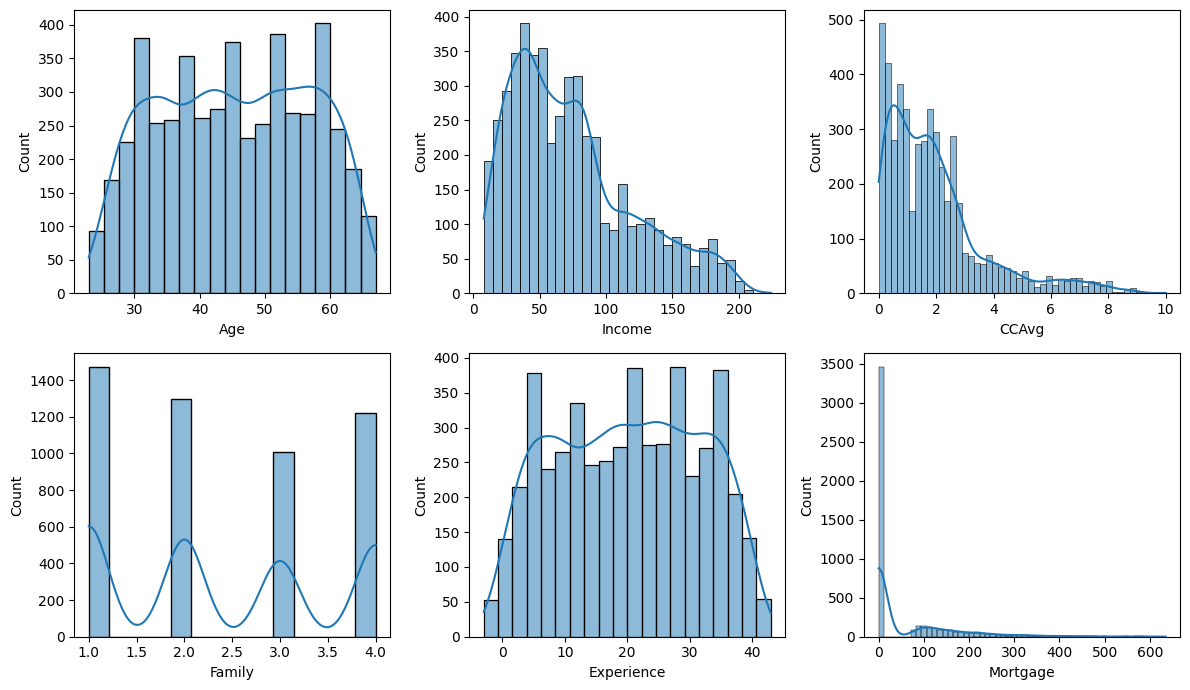

In [9]:
num_feat = df_bank[['Age','Income','CCAvg','Family','Experience','Mortgage']]
fig,ax = plt.subplots(2,3)
for i, v in zip(num_feat, ax.flatten()):
 sns.histplot(df_bank[i], ax = v, palette = colors[0], kde = True )

plt.tight_layout()
plt.show()


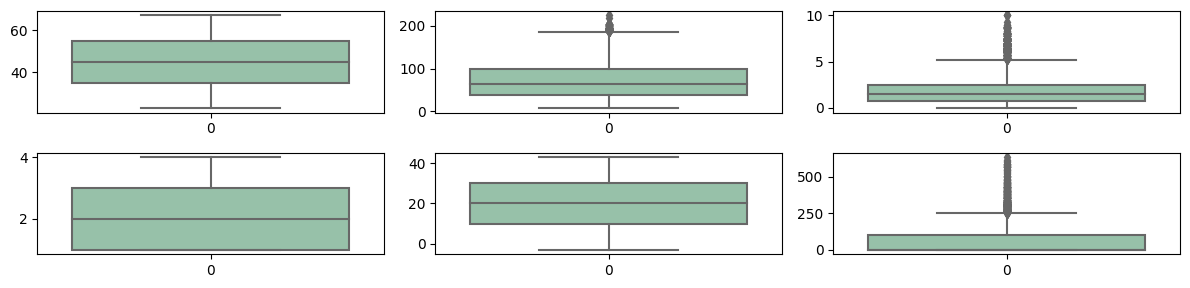

In [10]:
it=1
for i in num_feat:
 plt.subplot(5,3,it)
 sns.boxplot(df_bank[i], palette=colors, saturation = 2)
 it+=1

plt.tight_layout()
plt.show()


Statistical way - Skewness

In [11]:
num_feat.skew()

Age          -0.029341
Income        0.841339
CCAvg         1.598457
Family        0.155221
Experience   -0.026325
Mortgage      2.104002
dtype: float64

**Age**: The skewness value of -0.029341 suggests that the distribution of age is approximately symmetric or slightly
negatively skewed. This means that the data may have a slightly longer or fatter tail on the left side, indicating a relatively
higher frequency of younger individuals.

**Income**: The skewness value of 0.841339 indicates that the distribution of income is positively skewed. This suggests that
there may be a longer or fatter tail on the right side of the distribution, indicating a relatively higher frequency of higherincome individuals.

**CCAvg**: The skewness value of 1.598457 indicates that the distribution of CCAvg (credit card average) is positively
skewed. This suggests that there may be a longer or fatter tail on the right side of the distribution, indicating a relatively
higher frequency of individuals with higher credit card averages.

**Family**: The skewness value of 0.155221 suggests that the distribution of family size is approximately symmetric or slightly
positively skewed. This means that the data may have a slightly longer or fatter tail on the right side, indicating a relatively
higher frequency of larger families.

**Experience**: The skewness value of -0.026325 suggests that the distribution of experience is approximately symmetric or
slightly negatively skewed. This means that the data may have a slightly longer or fatter tail on the left side, indicating a
relatively higher frequency of individuals with less experience.

**Mortgage**: The skewness value of 2.104002 indicates that the distribution of mortgage is positively skewed. This suggests
that there may be a longer or fatter tail on the right side of the distribution, indicating a relatively higher frequency of
individuals with higher mortgage amounts







**Univariate - Categorical**

Visualization

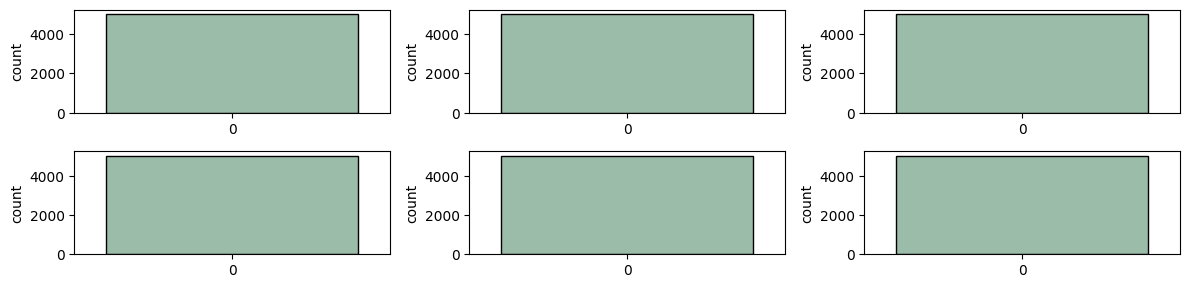

In [12]:
cat_feat = df_bank.drop(['Age','Income','CCAvg','Family',
 'Experience','Mortgage','ID','ZIP Code'], axis = 1)
it=1
for i in cat_feat:
 plt.subplot(5,3,it)
 sns.countplot(df_bank[i], palette=colors , edgecolor = 'k')
 it+=1

plt.tight_layout()
plt.show()


**Bivariate - Numerical**

Visualization

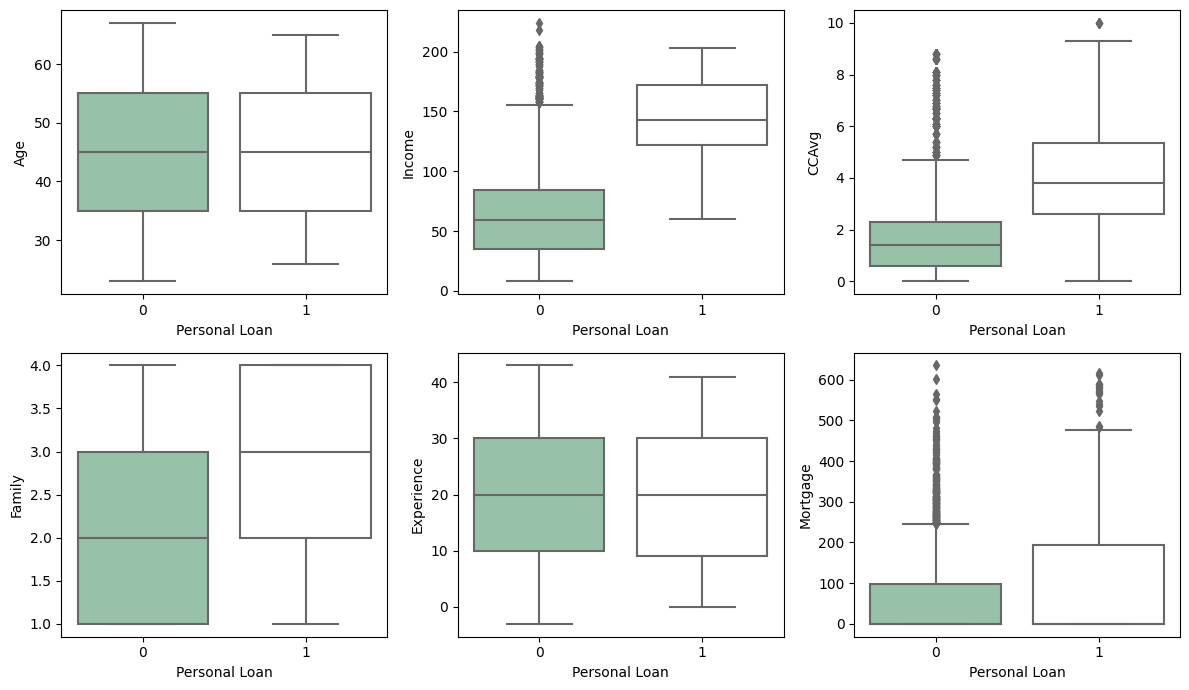

In [13]:
# Numerical Vs. Target (categorical)
f, ax = plt.subplots(2,3)
for i, v in zip(num_feat.columns, ax.flatten()):
 sns.boxplot(x = df_bank['Personal Loan'], y = df_bank[i], ax = v,
 palette=colors, saturation = 2)
plt.tight_layout()
plt.show()


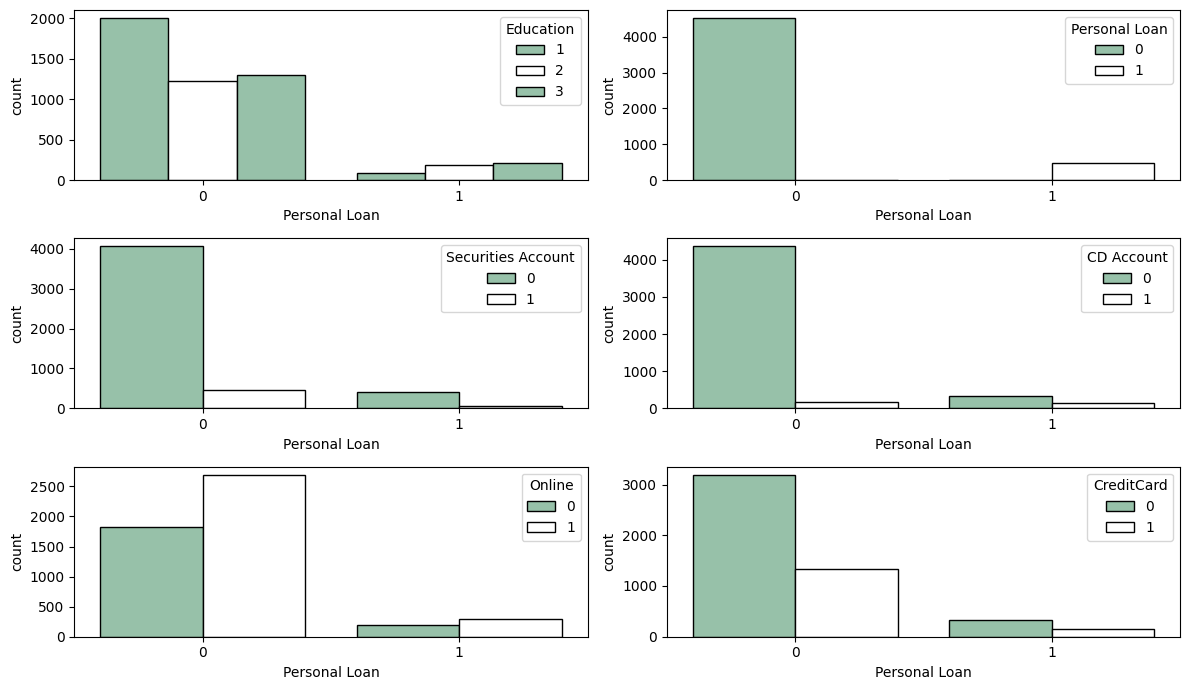

In [14]:
f,ax = plt.subplots(3,2)
for i, v in zip(cat_feat.columns, ax.flatten()):
 sns.countplot(x = df_bank['Personal Loan'], palette = colors,
 saturation = 2, hue = df_bank[i], edgecolor = 'black', ax = v)
plt.tight_layout()
plt.show()


**Multivariate Analysis**


In [15]:
df_bank.drop(['ID','ZIP Code'], axis = 1, inplace = True)
df_bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.600000,1,0,0,1,0,0,0
1,45,19,34,3,1.500000,1,0,0,1,0,0,0
2,39,15,11,1,1.000000,1,0,0,0,0,0,0
3,35,9,100,1,2.700000,2,0,0,0,0,0,0
4,35,8,45,4,1.000000,2,0,0,0,0,0,1


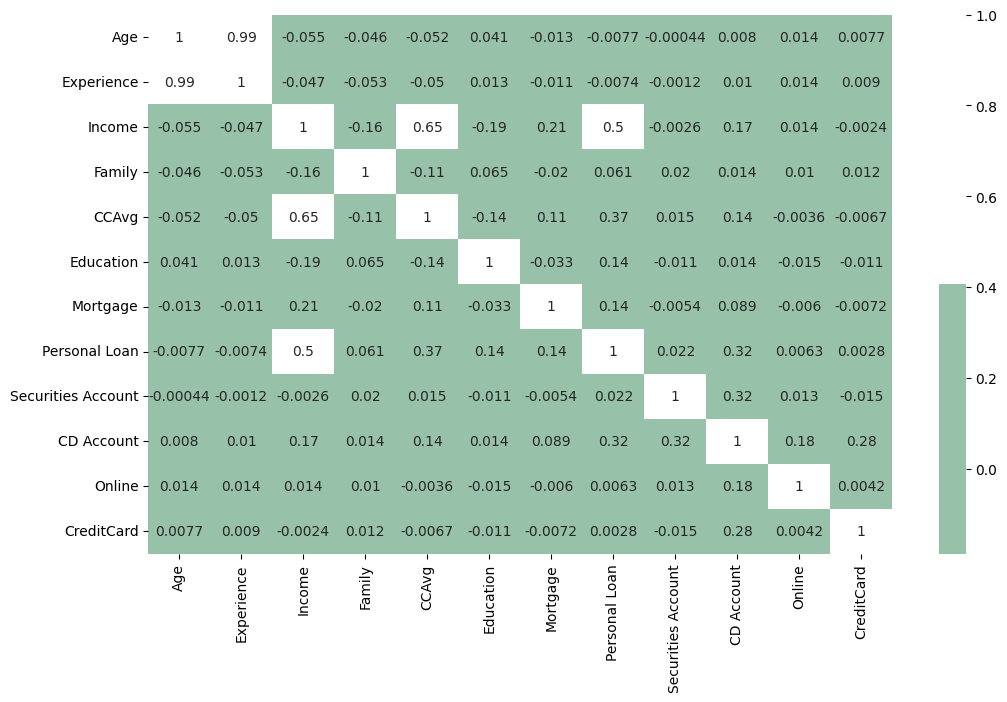

In [16]:
sns.heatmap(df_bank.corr(), annot=True, cmap=colors, linecolor='black')
plt.show()


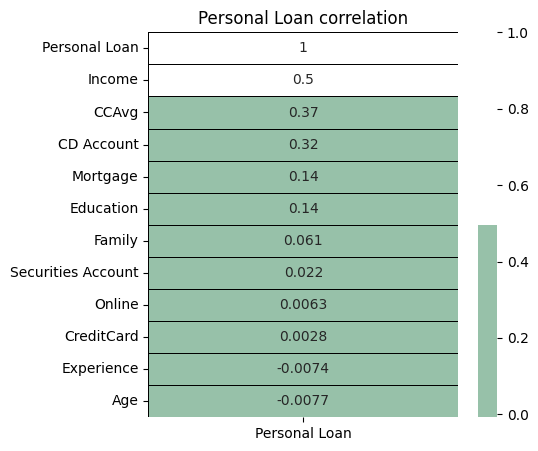

In [17]:
corr = df_bank.corrwith(df_bank['Personal Loan']).sort_values(ascending= False).to_frame()
corr.columns = ['Personal Loan']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot = True, cmap = colors , linewidths=0.4, linecolor='black')
plt.title('Personal Loan correlation')
plt.show()

 **Exploratory Data Analysis**



In [18]:
num_feat.skew()[((df_bank.skew() > 0.5) |(df_bank.skew() < -0.5))]

Income     0.841339
CCAvg      1.598457
Mortgage   2.104002
dtype: float64

In [22]:
pt = PowerTransformer()
df_bank[['Income', 'CCAvg', 'Mortgage']] = pt.fit_transform(df_bank[['Income', 'CCAvg', 'Mortgage']])

In [20]:
num_feat.skew()[((df_bank.skew() > 0.5) |(df_bank.skew() < -0.5))]

Income     0.841339
CCAvg      1.598457
Mortgage   2.104002
dtype: float64

**Splitting the data into train and test**


In [23]:
X = df_bank.drop('Personal Loan', axis = 1)
y = df_bank['Personal Loan']
xtrain, xtest, ytrain, ytest = train_test_split(sma.add_constant(X),y,
 test_size=0.2, random_state=10)

In [24]:
print('ytrain counts:',ytrain.value_counts(normalize=True),'ytest counts:',
 ytest.value_counts(normalize=True), sep ='\n')


ytrain counts:
0   0.903250
1   0.096750
Name: Personal Loan, dtype: float64
ytest counts:
0   0.907000
1   0.093000
Name: Personal Loan, dtype: float64


The data is imbalanced, so we are using SMOTE to create synthetic data and to balance the data

In [25]:
smote = SMOTE()
xresampled, yresampled = smote.fit_resample(X,y)
xtrain, xtest, ytrain, ytest = train_test_split(xresampled,yresampled,
 test_size=0.2, random_state=10)


In [26]:
print('ytrain counts:',ytrain.value_counts(normalize=True),'ytest counts:',
 ytest.value_counts(normalize=True), sep ='\n')

ytrain counts:
1   0.504425
0   0.495575
Name: Personal Loan, dtype: float64
ytest counts:
0   0.517699
1   0.482301
Name: Personal Loan, dtype: float64


**User defined function to store values of every models**

In [27]:
performance_df = pd.DataFrame(columns = ['Model Name','Train Accuracy', 'Train F1 score',
 'Test Accuracy', 'Test F1 Score', 'AUC Score','Remarks'])
def perf(model, name):
 global performance_df
 pred_train = model.predict(xtrain)
 pred_test = model.predict(xtest)
 pred_prob = model.predict_proba(xtest)[:,1]

 train_acc = accuracy_score(ytrain, pred_train)
 test_acc = accuracy_score(ytest, pred_test)
 train_f1 = f1_score(ytrain, pred_train)
 test_f1 = f1_score(ytest, pred_test)

 remarks = 'Overfit' if abs(train_acc - test_acc) > 0.02 or train_acc > 0.95 else \
 'Underfit' if train_acc < 0.80 or test_acc < 0.80 else 'Good Fit'

 performance_df = performance_df.append({'Model Name':name,'Train Accuracy':train_acc,
 'Train F1 score':train_f1,
'Test Accuracy':test_acc,'Test F1 Score':test_f1,
 'AUC Score': round(roc_auc_score(ytest,pred_test),4),
 'Remarks':remarks}, ignore_index=True)

 # plotting roc_curve and calculating auc_score

 fpr , tpr , threshold = roc_curve(ytest,pred_prob)

 plt.figure(figsize = (5,5))
 plt.plot(fpr,tpr)
 plt.plot([0.0,1.0],'r--')
 plt.text(x = 0.1, y = 1.0, s = ('auc_score',round(roc_auc_score(ytest,pred_test),4)))

 print(classification_report(ytest,pred_test))


# **Building Base Model**

Build through statsmodels.api

**Logistic Regression**


In [28]:
log_smamodel = sma.Logit(ytrain,sma.add_constant(xtrain)).fit()
print(log_smamodel.summary())

Optimization terminated successfully.
         Current function value: 0.224295
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 7232
Model:                          Logit   Df Residuals:                     7220
Method:                           MLE   Df Model:                           11
Date:                Tue, 11 Jul 2023   Pseudo R-squ.:                  0.6764
Time:                        11:48:58   Log-Likelihood:                -1622.1
converged:                       True   LL-Null:                       -5012.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.9751      1.055     -4.714      0.000      -7.044      -2.906
Age  

In [29]:
odds = pd.DataFrame(np.exp(log_smamodel.params), columns = ['ODDS'])
odds = odds.T
odds


,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ODDS,0.006908,0.954773,1.059794,44.654690,1.681333,1.727382,3.119080,1.013062,0.083575,62.050616,0.262623,0.146565


# **Interpretation of ODDS**


In [30]:
for i in odds.columns:
 print('''odds_{} = {}, it implies that the odds of taking personal loan increases by a
 factor of {} due to one unit increase in the {},
 keeping other variables constant'''.format(i,odds[i][0],odds[i][0],i))
 print()

odds_const = 0.006907985334936099, it implies that the odds of taking personal loan increases by a
 factor of 0.006907985334936099 due to one unit increase in the const,
 keeping other variables constant

odds_Age = 0.9547731019334906, it implies that the odds of taking personal loan increases by a
 factor of 0.9547731019334906 due to one unit increase in the Age,
 keeping other variables constant

odds_Experience = 1.059794344664875, it implies that the odds of taking personal loan increases by a
 factor of 1.059794344664875 due to one unit increase in the Experience,
 keeping other variables constant

odds_Income = 44.65469035967843, it implies that the odds of taking personal loan increases by a
 factor of 44.65469035967843 due to one unit increase in the Income,
 keeping other variables constant

odds_Family = 1.6813329736336156, it implies that the odds of taking personal loan increases by a
 factor of 1.6813329736336156 due to one unit increase in the Family,
 keeping other varia


**Scaling the data**


In [31]:
# scaling the data using standard scaler
ss = StandardScaler()
for i in num_feat:
 ss.fit(xtrain[[i]])
 xtrain[[i]] = ss.transform(xtrain[[i]])
 xtest[[i]] = ss.transform(xtest[[i]])

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       936
           1       0.89      0.93      0.91       872

    accuracy                           0.91      1808
   macro avg       0.91      0.91      0.91      1808
weighted avg       0.91      0.91      0.91      1808



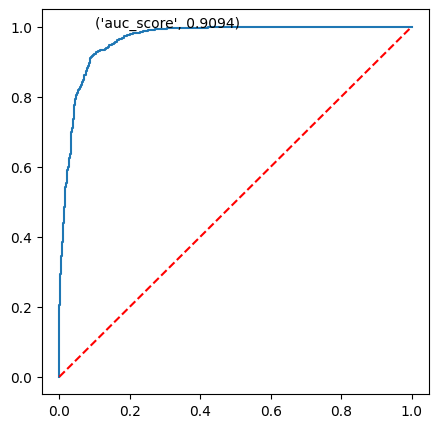

In [32]:
# Logistic regression model after scaling
model_lr = LogisticRegression().fit(xtrain,ytrain)
perf(model_lr,'Logistic Regression')

**Decision Tree Classifier**

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       936
           1       0.97      0.98      0.98       872

    accuracy                           0.98      1808
   macro avg       0.98      0.98      0.98      1808
weighted avg       0.98      0.98      0.98      1808



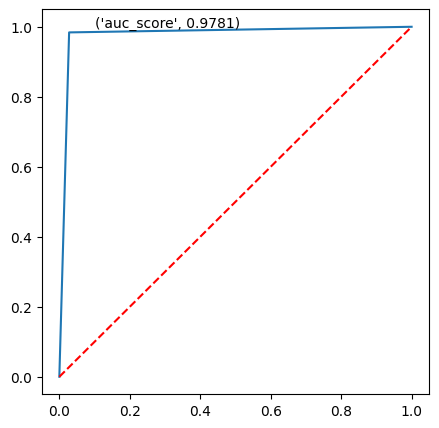

In [33]:
# Decision Tree without Pruning
model_dec = DecisionTreeClassifier().fit(xtrain,ytrain)
perf(model_dec, 'DecisionTree w/o hyperparameter tuning')

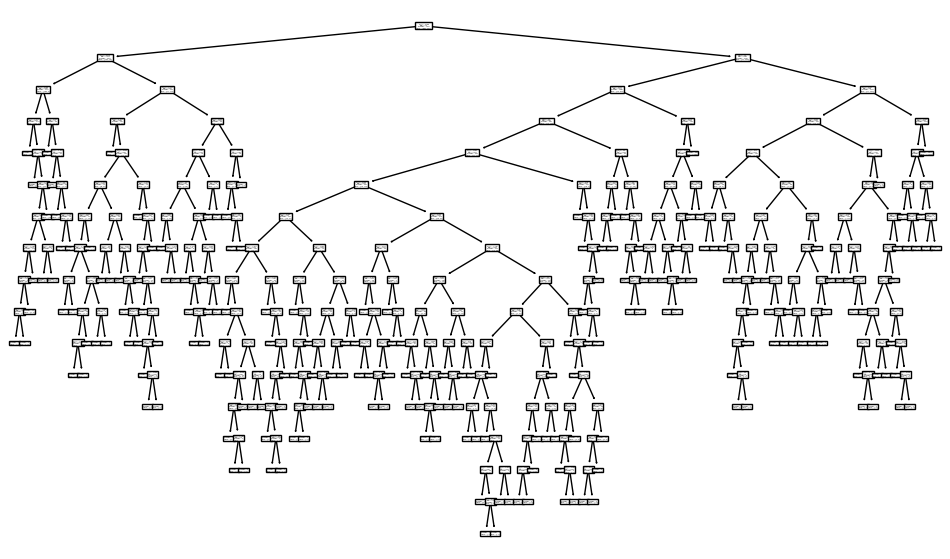

In [34]:
tree.plot_tree(model_dec)
plt.show()

Best parameters are : {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 50, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       936
           1       0.97      0.94      0.95       872

    accuracy                           0.95      1808
   macro avg       0.96      0.95      0.95      1808
weighted avg       0.95      0.95      0.95      1808



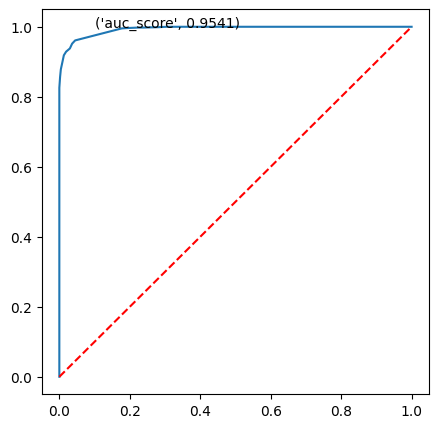

In [35]:
# Decision Tree model with hyperparameter tuning
params = {
 'max_depth': [5, 10, 15, 20, None],
 'min_samples_split': [2,5,10],
 'min_samples_leaf': [150,100,50],
 'max_features': ['sqrt','log2', None],
 'criterion': ['gini','entropy']
}
grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params).fit(xtrain, ytrain)
print('Best parameters are :',grid_dt.best_params_)
model_dt_tuned = DecisionTreeClassifier(criterion = grid_dt.best_params_.get('criterion'),
 max_depth = grid_dt.best_params_.get('max_depth'),
 min_samples_leaf = grid_dt.best_params_.get(
 'min_samples_leaf'),
 min_samples_split = grid_dt.best_params_.get(
 'min_samples_split'),
 max_features = grid_dt.best_params_.get(
 'max_features')).fit(xtrain,ytrain)
perf(model_dt_tuned, name = 'DecisionTree with hyperparameter tuning')

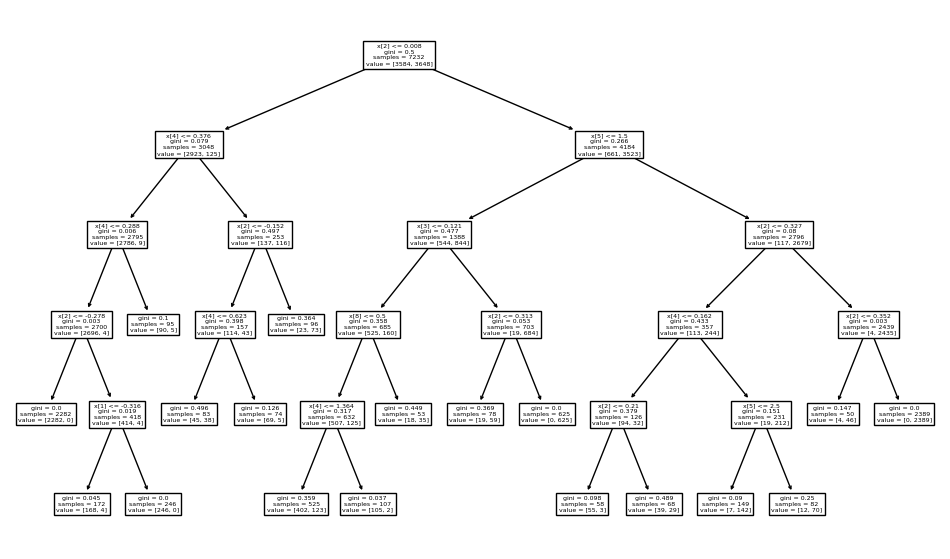

In [38]:
tree.plot_tree(model_dt_tuned)
plt.show()

**Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.99      0.99      0.99       872

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



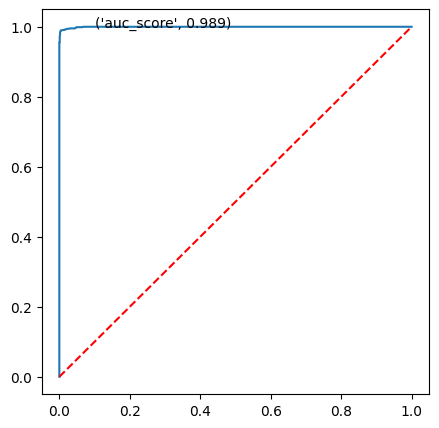

In [39]:
# Random Forest Classifier
model_rf = RandomForestClassifier().fit(xtrain, ytrain)
perf(model_rf, name = 'RandomForest without hyperparameter tuning')

Best parameters are : {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.99      0.99      0.99       872

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



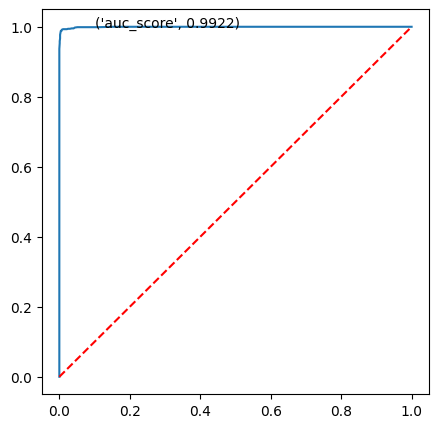

In [40]:
# Random Forest model with Hyperparameter tuning
params = {
 'n_estimators': [10,20,30],
 'max_depth': [5, 10, 15, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['sqrt', 'log2'],
 'bootstrap': [True, False],
 'criterion':['gini','entropy']
}
grid_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params).fit(xtrain,ytrain)
print('Best parameters are :',grid_rf.best_params_)
model_rf_tuned = RandomForestClassifier(n_estimators = grid_rf.best_params_.get('n_estimators'),
 max_depth = grid_rf.best_params_.get('max_depth'),
 min_samples_split = grid_rf.best_params_.get(
 'min_samples_split'),
 min_samples_leaf= grid_rf.best_params_.get(
 'min_samples_leaf'),
 max_features= grid_rf.best_params_.get(
 'max_features'),
 bootstrap= grid_rf.best_params_.get(
 'bootstrap'),
 criterion = grid_rf.best_params_.get(
 'criterion')).fit(xtrain,ytrain)
perf(model_rf_tuned,name = 'RandomForest with hyperparameter tuning')


**XGB Classifier**


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       936
           1       0.99      1.00      0.99       872

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



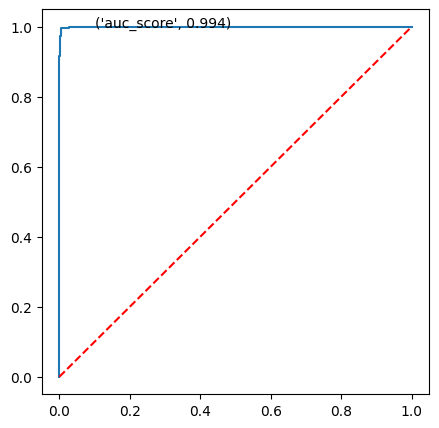

In [41]:
# XGB Model
model_xgb = XGBClassifier().fit(xtrain, ytrain)
perf(model_xgb, name = 'XGBoosting without hyperparameter tuning')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       936
           1       0.99      1.00      0.99       872

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



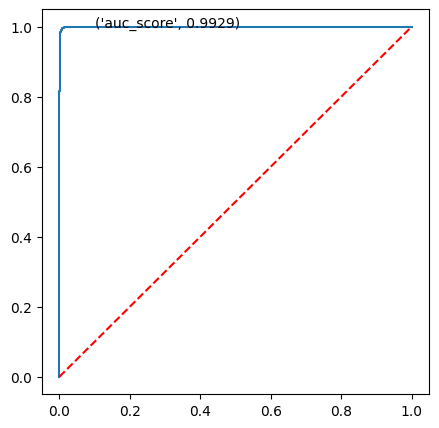

In [42]:
# XGB Hyperparameter tuning
params = {
 'n_estimators':[25,50,75],
 'learning_rate':[0.01,0.1,1],
 'max_depth':[3,5,7],
 'gamma':[0,0.1,0.5]
}
grid_xgb = GridSearchCV(estimator = XGBClassifier(), param_grid = params).fit(xtrain,ytrain)
model_xgb = XGBClassifier(n_estimators = grid_xgb.best_params_.get('n_estimators'),
 learning_rate = grid_xgb.best_params_.get('learning_rate'),
 max_depth = grid_xgb.best_params_.get('max_depth'),
 gamma = grid_xgb.best_params_.get('gamma')
 ).fit(xtrain, ytrain,)
perf(model_xgb, 'XGBoosting with hyperparameter tuning')


              precision    recall  f1-score   support

           0       0.98      0.95      0.97       936
           1       0.95      0.98      0.96       872

    accuracy                           0.97      1808
   macro avg       0.97      0.97      0.97      1808
weighted avg       0.97      0.97      0.97      1808



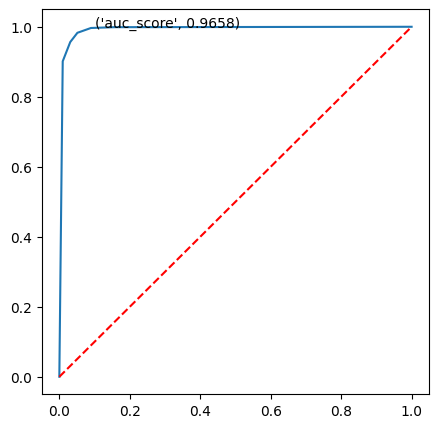

In [43]:
# KNN Model
knn = KNeighborsClassifier().fit(xtrain,ytrain)
perf(knn, 'KNN without hyperparameter tuning')


              precision    recall  f1-score   support

           0       0.99      0.96      0.97       936
           1       0.95      0.99      0.97       872

    accuracy                           0.97      1808
   macro avg       0.97      0.97      0.97      1808
weighted avg       0.97      0.97      0.97      1808



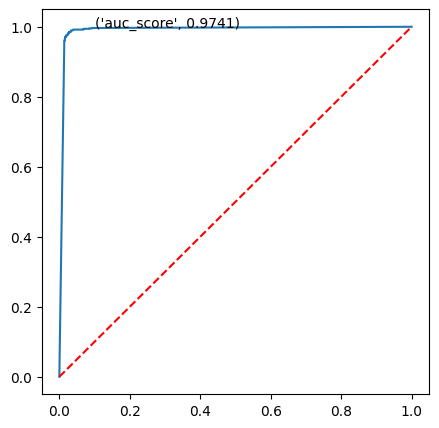

In [44]:
# KNN Model with pruning
params = {
 'n_neighbors' : [3,5,7,9,11],
 'weights': ['uniform','distance'],
 'metric': ['Manhattan','Euclidean', 'minkowski']
}
grid_knn = GridSearchCV(estimator = KNeighborsClassifier(),
 param_grid = params).fit(xtrain, ytrain)
knn = KNeighborsClassifier(n_neighbors= grid_knn.best_params_.get('n_neighbors'),
 weights= grid_knn.best_params_.get('weights'),
 metric= grid_knn.best_params_.get('metric'))
model_knn = knn.fit(xtrain,ytrain)
perf(model_knn, 'KNN Model with hyperparamter tuning')

**Adaboost classifier**

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       936
           1       0.92      0.97      0.94       872

    accuracy                           0.94      1808
   macro avg       0.95      0.95      0.94      1808
weighted avg       0.95      0.94      0.94      1808



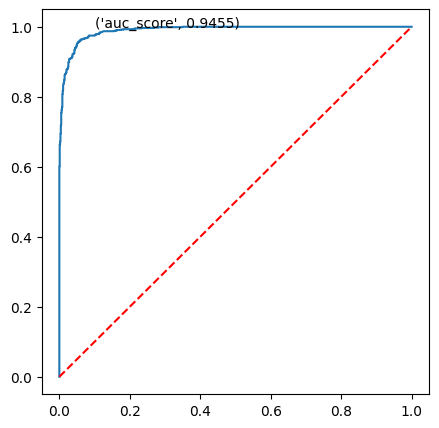

In [45]:
# AdaBoost Model
model_ab = AdaBoostClassifier().fit(xtrain,ytrain)
perf(model_ab,name = 'AdaBoost without hyperparameter tuning')

Best parameters are : {'learning_rate': 1, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       936
           1       0.93      0.97      0.95       872

    accuracy                           0.95      1808
   macro avg       0.95      0.96      0.95      1808
weighted avg       0.96      0.95      0.95      1808



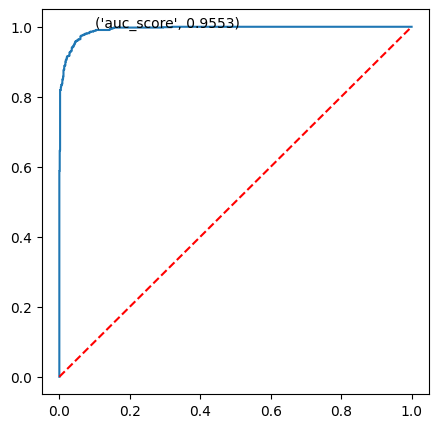

In [47]:
# Adaboost Model with Hyperparameter tuning
params = {
 'n_estimators': [50, 100, 200],
 'learning_rate': [0.01, 0.1, 1]
}
grid_ab = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = params).fit(xtrain,ytrain)
print('Best parameters are :',grid_ab.best_params_)
model_ab_tuned = AdaBoostClassifier(n_estimators = grid_ab.best_params_.get('n_estimators'),
 learning_rate = grid_ab.best_params_.get(
 'learning_rate')).fit(xtrain,ytrain)
perf(model_ab_tuned,name = 'AdaBoost with hyperparamter tuning')


**Stacking classifier**


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.99      0.99      0.99       872

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



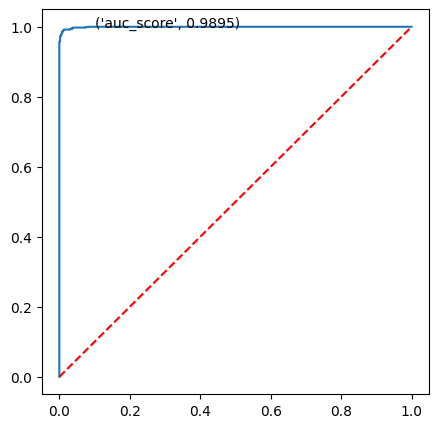

In [48]:
base_learners = [('model_dt',DecisionTreeClassifier(criterion='gini',
 max_depth=10, max_features = None ,
 min_samples_leaf= 50, min_samples_split= 2)),

 ('model_rf',RandomForestClassifier(criterion='gini',max_depth=None,
 max_features='sqrt',
min_samples_leaf=1,
n_estimators= 30)),

 ('model_knn', KNeighborsClassifier(n_neighbors = 3,
 weights= 'distance',
 metric= 'minkowski' ))]
model_stack = StackingClassifier(estimators = base_learners,
 final_estimator = GaussianNB(),
 n_jobs = -1).fit(xtrain,ytrain)
perf(model_stack,'Stacking Model')


In [49]:
# checking the performances of the models
def highlight_row(row):
    if row['Remarks'] == 'Good Fit':
        return pd.Series(['background-color: lightgreen']*len(row), index=row.index)
    else:
        return pd.Series(['background-color: white']*len(row), index=row.index)

performance_df.style.apply(highlight_row, axis=1)



,Model Name,Train Accuracy,Train F1 score,Test Accuracy,Test F1 Score,AUC Score,Remarks
0,Logistic Regression,0.907356,0.909874,0.908739,0.907459,0.909400,Good Fit
1,DecisionTree w/o hyperparameter tuning,1.000000,1.000000,0.977876,0.977221,0.978100,Overfit
2,DecisionTree with hyperparameter tuning,0.959624,0.959275,0.954646,0.952270,0.954100,Overfit
3,Stacking Model,1.000000,1.000000,0.987832,0.987414,0.987900,Overfit
4,RandomForest without hyperparameter tuning,1.000000,1.000000,0.988938,0.988558,0.989000,Overfit
5,RandomForest with hyperparameter tuning,1.000000,1.000000,0.992257,0.991972,0.992200,Overfit
6,XGBoosting without hyperparameter tuning,1.000000,1.000000,0.993916,0.993703,0.994000,Overfit
7,XGBoosting with hyperparameter tuning,1.000000,1.000000,0.992810,0.992567,0.992900,Overfit
8,KNN without hyperparameter tuning,0.976632,0.977029,0.965155,0.964547,0.965800,Overfit
9,KNN Model with hyperparamter tuning,1.000000,1.000000,0.973451,0.973003,0.974100,Overfit
